In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_netflix = pd.read_csv("Netflix Dataset.csv")
df_netflix.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df_netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
df_netflix.size #total number of element in dataset

85679

In [6]:
df_netflix.shape

(7789, 11)

In [7]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [8]:
df_netflix[df_netflix.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [9]:
df_netflix.drop_duplicates(inplace=True)

In [10]:
df_netflix[df_netflix.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [11]:
nan_df = df_netflix[df_netflix.isna().any(axis=1)]
nan_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
...,...,...,...,...,...,...,...,...,...,...,...
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [12]:
#heatmap to see null value 

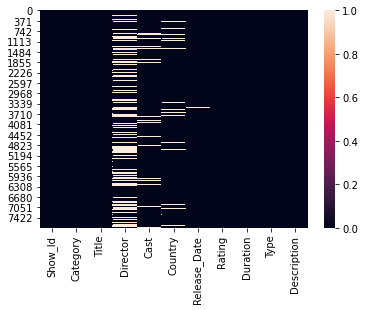

In [13]:
sns.heatmap(df_netflix.isnull())

#### #director have multiple null values also few null values incast, country and relese data

## Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [14]:
df_netflix.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [15]:
# using str.conatins

HOC = df_netflix[df_netflix.Title.str.contains("House of Cards")]

In [16]:
HOC.Show_Id

2832    s2833
Name: Show_Id, dtype: object

In [17]:
HOC.Director

2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object

In [18]:
#Using isin function
df_netflix[df_netflix.Title.isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [19]:
df_netflix['Release_Date'] = pd.to_datetime(df_netflix['Release_Date'])

In [20]:
df_netflix.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

In [21]:
df_netflix['Year'] = df_netflix['Release_Date'].dt.year

In [22]:
year_shows = df_netflix['Year'].value_counts()

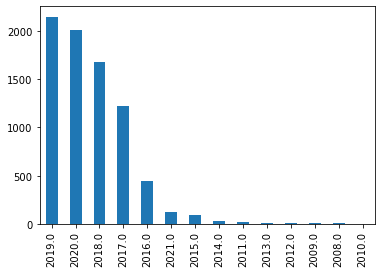

In [23]:
year_shows.plot(kind = 'bar')

## Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.


In [24]:
count_category = df_netflix.groupby("Category").count()

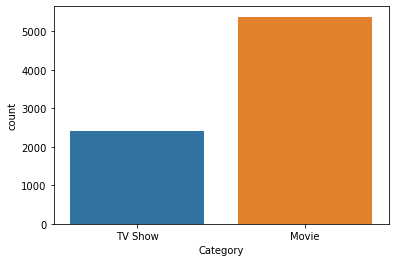

In [25]:
sns.countplot(df_netflix.Category)

## Q. 4) Show all the Movies that were released in year 2000.

In [26]:
df_netflix[(df_netflix.Category == 'Movie') & (df_netflix.Year == 2000)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year


In [27]:
df_netflix.Year.unique()

array([2020., 2016., 2018., 2017., 2019., 2021., 2015., 2013., 2011.,
         nan, 2012., 2014., 2008., 2009., 2010.])

In [28]:
df_netflix[(df_netflix.Category == 'Movie') & (df_netflix.Year == 2013)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,2013-11-01,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",2013.0
649,s650,Movie,Aziz Ansari: Buried Alive,"Will Lovelace, Dylan Southern",Aziz Ansari,United States,2013-11-01,TV-MA,80 min,Stand-Up Comedy,"""Parks and Recreation"" star Aziz Ansari takes ...",2013.0
2948,s2949,Movie,Iliza Shlesinger: War Paint,Jay Chapman,Iliza Shlesinger,United States,2013-09-01,NR,75 min,Stand-Up Comedy,"""Last Comic Standing"" winner Iliza Shlesinger ...",2013.0
5315,s5315,Movie,Russell Peters: Notorious,Dave Higby,Russell Peters,United States,2013-10-14,NR,72 min,Stand-Up Comedy,Global comedy star Russell Peters leaves no et...,2013.0
5588,s5588,Movie,Shrek the Musical,Jason Moore,"Brian d'Arcy James, Daniel Breaker, Sutton Fos...",United States,2013-12-29,TV-G,130 min,"Children & Family Movies, Comedies, Music & Mu...",The greatest fairy tale never told comes to li...,2013.0
6866,s6865,Movie,The Short Game,Josh Greenbaum,"Sky Sudberry, Allan Kournikova, Jed Dy, Zamoku...",United States,2013-12-12,PG,100 min,"Children & Family Movies, Documentaries, Sport...","They are fiercely competitive athletes, determ...",2013.0


## Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [29]:
df_netflix.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year'],
      dtype='object')

In [30]:
show_India = df_netflix[(df_netflix.Category == 'TV Show') & (df_netflix.Country == 'India')]

In [31]:
show_India['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [32]:
df_netflix.Director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: Director, dtype: int64

## Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [33]:
df_netflix.Type.unique

<bound method Series.unique of 0       International TV Shows, TV Dramas, TV Sci-Fi &...
1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
                              ...                        
7784                         Dramas, International Movies
7785       Dramas, International Movies, Music & Musicals
7786    Documentaries, International Movies, Music & M...
7787                   International TV Shows, Reality TV
7788                      Documentaries, Music & Musicals
Name: Type, Length: 7787, dtype: object>

In [34]:
df_netflix[df_netflix.Type == 'Comedies']

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019.0
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",2020-02-14,R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020.0
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,2018-01-26,TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,2019-11-05,R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019.0
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,2018-01-22,R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018.0
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States",2017-05-13,PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017.0
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019.0


In [35]:
record1 = df_netflix[((df_netflix.Category == 'Movie') & (df_netflix.Type == 'Comedies')) | (df_netflix.Country == 'United Kingdom')]

In [36]:
record1

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017.0


In [37]:
record = df_netflix[((df_netflix.Category == 'Movie') & (df_netflix.Type.str.contains('Comedies'))) | (df_netflix.Country == 'United Kingdom') ]

In [38]:
record

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,2019-05-21,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019.0
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


## Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [39]:
df_netflix.Cast = df_netflix.Cast.fillna("")

In [40]:
df_netflix.Cast.str.contains('Tom Cruise')

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Name: Cast, Length: 7787, dtype: bool

In [41]:
df_netflix[df_netflix.Cast.str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


## Q. 9) What are the different Ratings defined by Netflix ?

In [42]:
df_netflix.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year'],
      dtype='object')

In [43]:
df_netflix.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [44]:
df_netflix.Rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Rating, dtype: int64

## Q.9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [45]:
rating_can = df_netflix[(df_netflix.Category == 'Movie') & (df_netflix.Rating == 'TV-14') & (df_netflix.Country == 'Canada')  ]

In [46]:
rating_can.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,,Canada,2020-02-05,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017.0


In [47]:
rating_can.shape

(11, 12)

## Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [48]:
rating_2018 = df_netflix[(df_netflix.Category == 'TV Show') & (df_netflix.Rating == 'R') & (df_netflix.Year > 2018 ) ]

In [49]:
rating_2018

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0


In [50]:
rating_2018.shape

(1, 12)

## Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [51]:
df_time_min = df_netflix[~df_netflix.Duration.str.contains('Season')]

In [52]:
df_time_min.Duration = df_time_min.Duration.str.replace(' min',"")

In [53]:
df_time_min.Duration = df_time_min.Duration.astype(int)

In [54]:
df_time_min[df_time_min.Duration == df_time_min.Duration.max()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0


In [55]:
df_netflix.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year'],
      dtype='object')

In [56]:
df=df_netflix.copy()

In [57]:
df[['Time','Unit']] = df_netflix.Duration.str.split(" ",expand= True)

In [58]:
df.Time = df.Time.astype(int)

In [59]:
max_time = df[df.Unit.str.contains("min")].Time.max()

In [60]:
df[(df.Time == max_time) & (df.Unit.str.contains("min"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Time,Unit
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,312,min


In [61]:
#max season

In [62]:
df.Unit.unique()

array(['Seasons', 'min', 'Season'], dtype=object)

In [63]:
max_seson = df[df.Unit.str.contains("Season")].Time.max()

In [64]:
df[(df.Time == max_seson) & (df.Unit.str.contains("Season"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Time,Unit
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0,16,Seasons


## Q. 11) Which individual country has the Highest No. of TV Shows ?

In [65]:
df_tvshow = df_netflix[df_netflix.Category == 'TV Show']

In [74]:
df_tvshow.Country.value_counts().head(1)

United States    705
Name: Country, dtype: int64

## Q. 12) How can we sort the dataset by Year ?

In [68]:
df_netflix.sort_values('Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0
1765,s1766,TV Show,Dinner for Five,NaN,,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN


## Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [69]:
df_netflix[((df_netflix.Category == 'Movie') & (df_netflix.Type == 'Dramas')) | ((df_netflix.Category == 'TV Show') & (df_netflix.Type == "Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017.0
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0
